### Практическое задание к уроку 5 по теме "Проверка статистических гипотез. P-значения. Доверительные интервалы".

#### Задание 1.  
*Известно, что генеральная совокупность распределена нормально  
с известным средним квадратическим отклонением 16. Найти ширину  
доверительного интервала для оценки математического ожидания  
<img src="https://latex.codecogs.com/svg.image?\mu" title="\mu" /> с надёжностью 0.95, если выборочное среднее равно 80,  
а объём выборки равен 256.*

Так как мы имеем дело с нормально распределенной случайной величиной  
и нам известно её среднее квадратическое отклонение, то воспользуемся  
Z-статистикой:

<img src="https://latex.codecogs.com/svg.image?P(\overline{X}&space;&plus;&space;t_{\alpha/2}&space;\cdot&space;\dfrac{\sigma}{\sqrt{n}}&space;\le&space;\mu&space;\le&space;\overline{X}&space;&plus;&space;t_{1&space;-&space;\alpha/2}&space;\cdot&space;\dfrac{\sigma}{\sqrt{n}})&space;=&space;p" title="P(\overline{X} + t_{\alpha/2} \cdot \dfrac{\sigma}{\sqrt{n}} \le \mu \le \overline{X} + t_{1 - \alpha/2} \cdot \dfrac{\sigma}{\sqrt{n}}) = p" />

Нам нужно найти ширину доверительного интервала, то есть  
разность между его границами.  
По условию известно, что:  
<img src="https://latex.codecogs.com/svg.image?\sigma&space;=&space;16" title="\sigma = 16" />  
<img src="https://latex.codecogs.com/svg.image?p&space;=&space;0.95" title="p = 0.95" />  
<img src="https://latex.codecogs.com/svg.image?\overline{X}&space;=&space;80" title="\overline{X} = 80" />  
<img src="https://latex.codecogs.com/svg.image?n&space;=&space;256" title="n = 256" />

In [1]:
std = 16
p = 0.95
mean = 80
n = 256

Здесь нам неизвестны только квантили порядка <img src="https://latex.codecogs.com/svg.image?\alpha/2" title="\alpha/2" /> и <img src="https://latex.codecogs.com/svg.image?1&space;-&space;\alpha/2" title="1 - \alpha/2" />.  
Найдём их при условии, что <img src="https://latex.codecogs.com/svg.image?\inline&space;\alpha&space;=&space;1&space;-&space;p" title="\inline \alpha = 1 - p" /> и зная, что Z-статистика  
имеет стандартное нормальное распределение:

In [2]:
alpha = 1 - p

In [3]:
import scipy.stats

In [4]:
z = scipy.stats.norm()

In [5]:
t_left = z.ppf(alpha/2)
t_right = z.ppf(1-alpha/2)

t_left , t_right

(-1.959963984540054, 1.959963984540054)

Теперь найдём границы доверительного интервала:

In [6]:
left = mean + t_left * std / n**0.5
left

78.04003601545995

In [7]:
right = mean + t_right * std / n**0.5
right

81.95996398454005

Тогда ширина доверительного интервала будет равна:

In [8]:
right - left

3.9199279690801063

#### Задание 2.  
*Продавец утверждает, что средний вес пачки печенья составляет 200 г.  
Из партии извлечена выборка из 10 пачек. Вес каждой пачки составляет:*  
```
202, 203, 199, 197, 195, 201, 200, 204, 194, 190
```
*Известно, что их веса распределены нормально. Верно ли утверждение продавца,  
если учитывать, что уровень значимости равен 1%? Найдите P-значение  
для данного теста и укажите его в качестве ответа.*

Здесь нулевая гипотеза заключается в том, что математическое  
ожидание случайной величины равно 200 г.

Нам дано:  
<img src="https://latex.codecogs.com/svg.image?\inline&space;\mu&space;=&space;200" title="\inline \mu = 200" />  
<img src="https://latex.codecogs.com/svg.image?\inline&space;n&space;=&space;10" title="\inline n = 10" />  
<img src="https://latex.codecogs.com/svg.image?\inline&space;\alpha&space;=&space;0.01" title="\inline \alpha = 0.01" />

In [9]:
samples = (202, 203, 199, 197, 195, 201, 200, 204, 194, 190)
mu = 200
n = 10
alpha = 0.01

Так как случайная величина распределена нормально, и нам  
неизвестна величина её среднего квадратичного отклонения,  
то будем пользоваться t-статистикой:  
<img src="https://latex.codecogs.com/svg.image?\inline&space;t&space;=&space;\dfrac{\overline{X}&space;-&space;\mu}{\sigma_X&space;/&space;\sqrt{n}}" title="\inline t = \dfrac{\overline{X} - \mu}{\sigma_X / \sqrt{n}}" />

Найдём выборочное среднее <img src="https://latex.codecogs.com/svg.image?\inline&space;\overline{X}" title="\inline \overline{X}" /> и среднее  
квадратичное отклонение <img src="https://latex.codecogs.com/svg.image?\inline&space;\sigma_X" title="\inline \sigma_X" /> нашей выборки:

In [10]:
import numpy as np

In [11]:
mean = np.mean(samples)
mean

198.5

In [12]:
std = np.std(samples, ddof=1)
std

4.453463071962462

Значение статистики будет равно:

In [13]:
S = (mean - mu) / (std / n**0.5)
S

-1.0651074037450896

Так как t-статистика имеет распределение Стьюдента, то  
критическая область будет двусторонней, и Р-значение будет  
находиться по формуле:  
<br>
<img src="https://latex.codecogs.com/svg.image?\inline&space;P&space;=&space;2&space;\cdot&space;min(P_l,&space;P_r)" title="\inline P = 2 \cdot min(P_l, P_r)" />, где  
<br>
<img src="https://latex.codecogs.com/svg.image?\inline&space;P_l&space;=&space;F_S(S)" title="\inline P_l = F_S(S)" /> - P-значение для левосторонней области;  
<img src="https://latex.codecogs.com/svg.image?\inline&space;P_r&space;=&space;1&space;-&space;F_S(S)" title="\inline P_r = 1 - F_S(S)" /> - P-значение для правосторонней области.

Найдём <img src="https://latex.codecogs.com/svg.image?\inline&space;F_S(S)" title="\inline F_S(S)" />, то есть значение функции распределения Стьюдента  
с параметром df = n-1 в точке S:

In [14]:
F_S = scipy.stats.t.cdf(S, df=n-1)
F_S

0.15728330176236424

Тогда:

In [15]:
P_l = F_S
P_r = 1 - F_S
P_l, P_r

(0.15728330176236424, 0.8427166982376357)

Найдём Р-значение:

In [16]:
p_value = 2 * min(P_l, P_r)
p_value

0.3145666035247285

Получившееся Р-значение превышает заданный в условии уровень значимости (0.01),  
следовательно, нулевую гипотезу мы не отвергаем, утверждение продавца верно.

Данную задачу также можно было решить в одну строчку, используя  
встроенную в scipy функцию для t-теста:

In [17]:
scipy.stats.ttest_1samp(samples, popmean=200)

Ttest_1sampResult(statistic=-1.0651074037450896, pvalue=0.3145666035247285)

#### Задание 3.  
*Дана выборка диаметров подшипников из примера 1 с занятия 5:*
```
samples = [0.6603, 0.9466, 0.5968, 1.3792, 1.5481, 0.7515, 1.0681, 1.1134,
           1.2088, 1.701 , 1.0282, 1.3579, 1.0191, 1.1784, 1.1168, 1.1372,
           0.7273, 1.3958, 0.8665, 1.5112, 1.161 , 1.0232, 1.0865, 1.02  ]
```
*Предполагая, что диаметры подшипников распределены нормально,  
проверьте гипотезу о том, что дисперсия случайной величины равна  
`0.0625` при уровне значимости `alpha = 0.05`. Что для этого нужно знать:*  
1. *Альтернативная гипотеза двухсторонняя.*
2. *Статистика для теста: <img src="https://latex.codecogs.com/svg.image?\inline&space;H&space;=&space;\dfrac{(n&space;-&space;1)&space;\cdot&space;D_X}{D}" title="\inline H = \dfrac{(n - 1) \cdot D_X}{D}" />,  
где n - число элементов в выборке;  
<img src="https://latex.codecogs.com/svg.image?\inline&space;D_X" title="\inline D_X" /> - несмещённая оценка дисперсии;  
<img src="https://latex.codecogs.com/svg.image?\inline&space;D" title="\inline D" /> - утверждаемая нулевой гипотезой дисперсия.*
3. *Эта статистика в предположении верности нулевой гипотезы имеет  
распределение хи-квадрат с параметром `df = n - 1`. Её квантили можно  
найти с помощью функции `scipy.stats.chi2.ppf`.*

*В качестве ответа запишите 1, если нулевая гипотеза верна, и 0 иначе.*

In [18]:
samples = np.array([0.6603, 0.9466, 0.5968, 1.3792, 1.5481, 0.7515, 1.0681, 1.1134,
                    1.2088, 1.701 , 1.0282, 1.3579, 1.0191, 1.1784, 1.1168, 1.1372,
                    0.7273, 1.3958, 0.8665, 1.5112, 1.161 , 1.0232, 1.0865, 1.02])
D = 0.0625
alpha = 0.05
n = samples.shape[0]

В этой задаче нам нужно найти критическую область и посмотреть, будет ли  
туда входить значение статистики для нашей выборки.

Рассчитаем дисперсию выборки:

In [19]:
D_X = np.var(samples, ddof=1)
D_X

0.07804495041666669

Найдём значение статистики:

In [20]:
H = (n - 1) * D_X / D
H

28.720541753333343

Так как гипотеза двусторонняя, то критическая область будет  
состоять из двух интервалов:  
<img src="https://latex.codecogs.com/svg.image?\inline&space;\Omega_\alpha&space;=&space;(-\infty,&space;t_{\alpha/2})&space;\lor&space;(t_{1-\alpha/2},&space;&plus;\infty)" title="\inline \Omega_\alpha = (-\infty, t_{\alpha/2}) \lor (t_{1-\alpha/2}, +\infty)" />

Для нахождения границ интервалов найдём квантили функции  
распределения хи-квадрат:

In [21]:
stat = scipy.stats.chi2(df=n-1)

In [22]:
t1 = scipy.stats.chi2.ppf(alpha/2, df=n-1)
t2 = scipy.stats.chi2.ppf(1 - alpha/2, df=n-1)

t1, t2

(11.688551922452438, 38.0756272503558)

Изобразим критическую область и наше значение  статистики  
на графике:

In [23]:
# %config InlineBackend.figure_format = 'svg'
%matplotlib inline

import matplotlib.pyplot as plt
from pylab import rcParams

rcParams['font.size'] = 15
rcParams['figure.figsize'] = 8, 5
plt.style.use('seaborn-whitegrid')

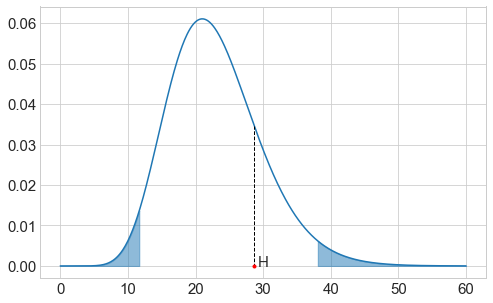

In [24]:
ox = np.linspace(0, 60, 500)
oy = scipy.stats.chi2(df=n-1).pdf(ox)

ox_left = np.linspace(0, t1, 100)
oy_left = scipy.stats.chi2(df=n-1).pdf(ox_left)

ox_right = np.linspace(t2, 60, 100)
oy_right = scipy.stats.chi2(df=n-1).pdf(ox_right)

plt.plot(ox, oy)
plt.axvline(x=H, ymin = 0.04, ymax=0.56, lw=1, ls='dashed', color='black')
plt.plot([H], [0], marker='o', color='red', ms=3)
plt.annotate('H', xy=(H+0.5, 0))
plt.fill_between(ox_left, oy_left, alpha=0.5, color='C0')
plt.fill_between(ox_right, oy_right, alpha=0.5, color='C0')

plt.show()

Так как наше значение статистики (точка Н) не попадает в критическую область,  
то мы не отвергаем нулевую гипотезу. Следовательно, она верна.  
<u>Ответ:</u> 1